In [53]:
#LIBERARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier



SyntaxError: invalid non-printable character U+00A0 (1810710812.py, line 19)

In [62]:
#TASK1 (cleaning)


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df_notcleaned = pd.read_csv("Sprint_Results.csv")

# Drop unnecessary columns to prevent errors in my coding and some of them are not needed
columns_to_drop = ['BroadcastName', 'Abbreviation', 'TeamColor', 'FirstName', 'LastName', 'FullName', 'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'RoundNumber', 'Race Type', 'EventName']
df = df_notcleaned.drop(columns=columns_to_drop)

# Convert 'Status' column to numeric because categorical columns may interupt the model
status_mapping = {'Finished': 1, 'Retired': 0}  
df['Status'] = df['Status'].map(status_mapping)

# Print the cleaned Data
print("Cleaned Data:")
print(df.head())

# Save the cleaned data to a new CSV file
df.to_csv("Sprint_Results.csv", index=False)

# Return the cleaned DataFrame
df


Cleaned Data:
   DriverNumber         TeamName  Position  Status  Points
0            11  Red Bull Racing       1.0     1.0     8.0
1            16          Ferrari       2.0     1.0     7.0
2             1  Red Bull Racing       3.0     1.0     6.0
3            63         Mercedes       4.0     1.0     5.0
4            55          Ferrari       5.0     1.0     4.0


,DriverNumber,TeamName,Position,Status,Points
0,11,Red Bull Racing,1.0,1.0,8.0
1,16,Ferrari,2.0,1.0,7.0
2,1,Red Bull Racing,3.0,1.0,6.0
3,63,Mercedes,4.0,1.0,5.0
4,55,Ferrari,5.0,1.0,4.0
...,...,...,...,...,...
114,20,Haas F1 Team,16.0,1.0,0.0
115,24,Alfa Romeo,17.0,1.0,0.0
116,27,Haas F1 Team,18.0,1.0,0.0
117,77,Alfa Romeo,19.0,1.0,0.0


   DriverNumber         TeamName  Position  Status  Points
0            11  Red Bull Racing       1.0     1.0     8.0
1            16          Ferrari       2.0     1.0     7.0
2             1  Red Bull Racing       3.0     1.0     6.0
3            63         Mercedes       4.0     1.0     5.0
4            55          Ferrari       5.0     1.0     4.0
DriverNumber      int64
TeamName         object
Position        float64
Status          float64
Points          float64
dtype: object
       DriverNumber    Position      Status      Points
count    119.000000  119.000000  115.000000  119.000000
mean      28.126050   10.420168    0.956522    1.815126
std       23.482613    5.748243    0.204824    2.655236
min        1.000000    1.000000    0.000000    0.000000
25%       11.000000    5.500000    1.000000    0.000000
50%       22.000000   10.000000    1.000000    0.000000
75%       42.000000   15.000000    1.000000    3.500000
max       81.000000   20.000000    1.000000    8.000000
DriverNu

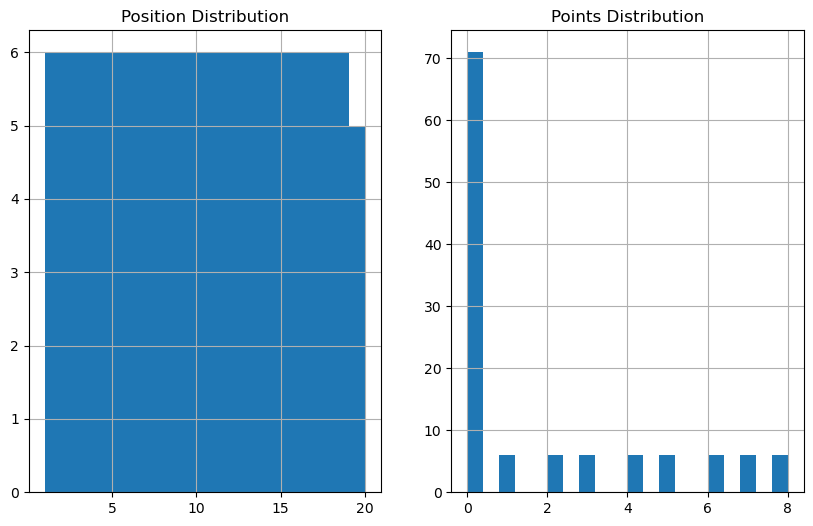

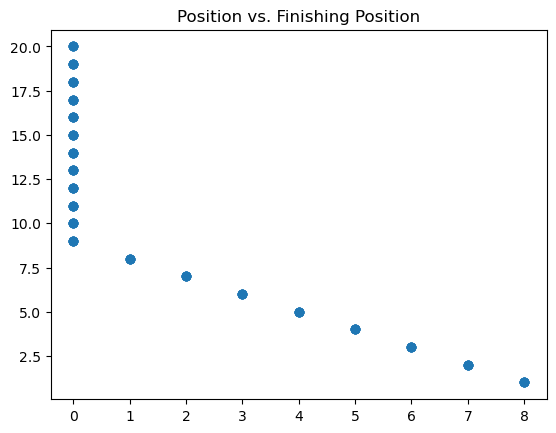

TeamName
Alfa Romeo         0.000000
AlphaTauri         0.250000
Alpine             0.833333
Aston Martin       1.166667
Ferrari            3.583333
Haas F1 Team       0.250000
McLaren            3.000000
Mercedes           2.916667
Red Bull Racing    5.833333
Williams           0.181818
Name: Points, dtype: float64


In [63]:
#TASK 1 



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load your data
df = pd.read_csv("Sprint_Results.csv")

# describing the data and the features 
print(df.head())  # View the first few rows
print(df.dtypes)  # Check data types
print(df.describe())  # Descriptive statistics for numerical features
print(df.nunique())  # Number of unique values for each feature 

# Check for any missing values
print(df.isnull().sum()) 


# calculating the difference between position  and  points
df['Postion_Diff_Grid_Race'] = df['Position'] - df['Points']  

# Exploring the  data distribution 
plt.figure(figsize=(10, 6))
plt.subplot(121)
df['Position'].hist(bins=20)
plt.title("Position Distribution")
plt.subplot(122)
df['Points'].hist(bins=20)
plt.title("Points Distribution")
plt.show()

# the relationship between the grid performance of drivers in the race and their Grid position 
plt.scatter(df['Points'], df['Position'])
plt.title("Position vs. Finishing Position")
plt.show()

# The average points for the constructer teams 
print(df.groupby('TeamName')['Points'].mean())  







In [66]:
#TASK 2 

import pandas as pd

# Load the dataset
df = pd.read_csv("Sprint_Results.csv")

# Convert categorical features to numerical representations
df_encoded = pd.get_dummies(df, columns=['TeamName', 'Position'])

#i will label encode "team names" to make it work as we are dealing with categorical variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['TeamName'] = label_encoder.fit_transform(df['TeamName'])

# Save the modified dataset
df_encoded.to_csv("Sprint_Results_Features.csv", index=False)

# Displaying the first few rows of the transformed dataset to make sure of the data quality and code efficiency 
print(df_encoded.head())


   DriverNumber  Status  Points  TeamName_Alfa Romeo  TeamName_AlphaTauri  \
0            11     1.0     8.0                False                False   
1            16     1.0     7.0                False                False   
2             1     1.0     6.0                False                False   
3            63     1.0     5.0                False                False   
4            55     1.0     4.0                False                False   

   TeamName_Alpine  TeamName_Aston Martin  TeamName_Ferrari  \
0            False                  False             False   
1            False                  False              True   
2            False                  False             False   
3            False                  False             False   
4            False                  False              True   

   TeamName_Haas F1 Team  TeamName_McLaren  ...  Position_11.0  Position_12.0  \
0                  False             False  ...          False          False

In [67]:
#TASK3


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd




# Handle missing values if there is any again just in case after doing multiple modifications 
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Loaded the dataset after the engineering 
df = pd.read_csv('Sprint_Results_Features.csv')

# Checking if it's a classification task
target_variable = 'Points'  
if df[target_variable].nunique() <= 2:
    print("Classification Task")
else:
    print("Regression Task or Clustering Task")


# chose 'DriverNumber' and 'Points' to be the features
X = df[['DriverNumber', 'Points']]  
y = df['Points']  

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"{name} Accuracy: {accuracy:.2f}")



Regression Task or Clustering Task


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.83
Random Forest Accuracy: 0.92
Gradient Boosting Accuracy: 1.00


Training Logistic Regression...
Logistic Regression Accuracy: 0.83
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       0.00      0.00      0.00         1
         2.0       0.50      1.00      0.67         1
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         1
         5.0       0.33      1.00      0.50         1
         7.0       0.00      0.00      0.00         1
         8.0       1.00      1.00      1.00         1

    accuracy                           0.83        24
   macro avg       0.35      0.50      0.39        24
weighted avg       0.75      0.83      0.78        24



Training Random Forest...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Random Forest Accuracy: 0.88
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         1
         3.0       0.50      1.00      0.67         1
         4.0       0.00      0.00      0.00         1
         5.0       1.00      1.00      1.00         1
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1

    accuracy                           0.88        24
   macro avg       0.56      0.62      0.58        24
weighted avg       0.85      0.88      0.86        24



Training Gradient Boosting...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00         1
         5.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         1
         8.0       1.00      1.00      1.00         1

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



Logistic Regression Accuracy: 0.83


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.88
Gradient Boosting Accuracy: 1.00


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


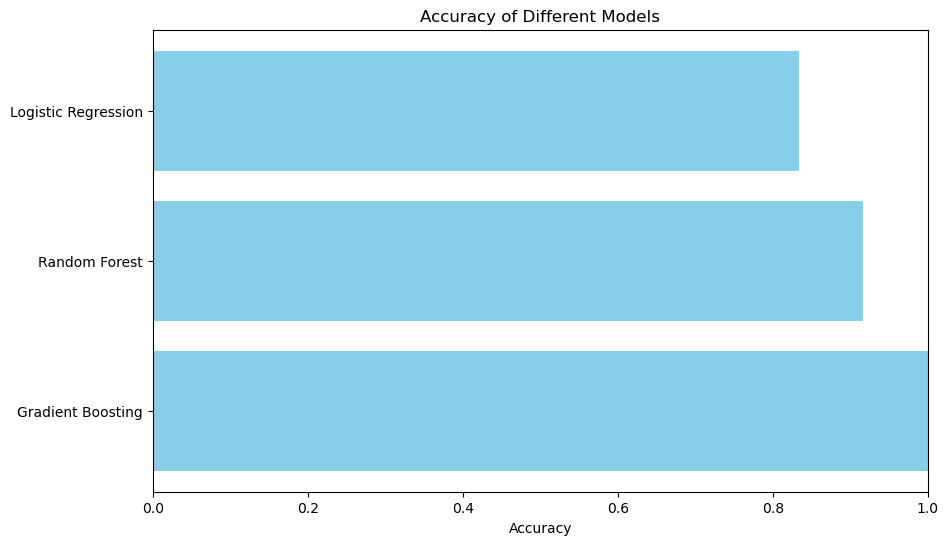

In [68]:
#TASK4

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("\n")
    
    
    
    
    
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    
# now i am going to store the accuracies in a dictionary 
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# doint a bar plot to represent the accuracies and compare them 
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis() 
plt.show()